In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cupy-model-npz/model_epoch_7_20250316_124003.npz


In [2]:
!pip install cupy-cuda12x

In [3]:
import numpy as np
import cupy as cp  # 确保 cupy 已安装

# 加载 .npz 文件
file_path = '/kaggle/input/cupy-model-npz/model_epoch_7_20250316_124003.npz'
data = np.load(file_path, allow_pickle=True)

# 查看文件中包含的数组名称
print("Arrays in the .npz file:", data.files)

# 遍历文件中的每个数组
for key in data.files:
    array = data[key]
    if isinstance(array, cp.ndarray):
        print(f"Converting {key} from cupy.ndarray to numpy.ndarray")
        array = cp.asnumpy(array)  # 将 cupy 数组转换为 NumPy 数组
    print(f"Array {key}:\n", array)


Arrays in the .npz file: ['model_state', 'optimizer_state', 'history', 'epoch']
Array model_state:
 {'module_0': {'param_0': {'val': array([[[[ 1.45674774e-153, -1.16489671e-173,  1.57993605e-151],
         [ 1.77082842e-153,  8.37814137e-148,  9.78917038e-152],
         [-1.41375883e-151,  3.14075224e-154,  8.22881327e-153]]],


       [[[-3.54314356e-151, -9.02726290e-156,  6.22138988e-148],
         [-3.34576227e-152, -4.44754203e-148,  8.83074532e-168],
         [-6.84200058e-150,  7.60398765e-152, -4.25110704e-149]]],


       [[[-4.86333730e-152,  1.98378145e-151, -1.27759800e-151],
         [-4.04097257e-151,  7.18450356e-154, -5.37685463e-152],
         [ 3.44785977e-153,  7.68128565e-142, -1.06129235e-160]]],


       ...,


       [[[ 1.55429501e-152,  1.87387741e-151, -2.91302775e-155],
         [ 1.54148291e-152, -6.58458734e-152, -1.81228322e-152],
         [ 6.76386293e-148,  1.74789912e-151,  1.87539326e-158]]],


       [[[ 2.87831551e-142, -2.52484083e-151, -1.97424116

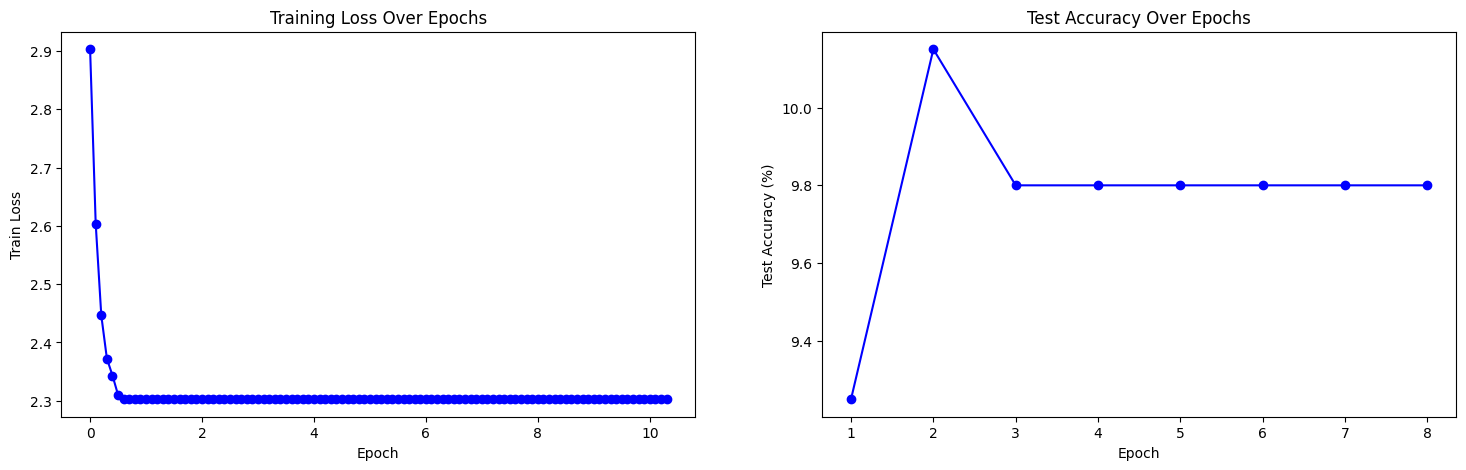

In [9]:
import matplotlib.pyplot as plt

# data['history']
train_loss = [
    2.90310325, 2.60372448, 2.4462175, 2.3723728, 2.34318054, 2.30985382, 2.30254199,
    2.30258398, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409,
    2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409,
    2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409,
    2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409,
    2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409,
    2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409,
    2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409,
    2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409,
    2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409,
    2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409,
    2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409,
    2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409,
    2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409,
    2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409, 2.30258409
]

# 创建 epoch 数组，每个值代表 0.1 epoch
epochs = [i * 0.1 for i in range(len(train_loss))]

import matplotlib.pyplot as plt

# 测试准确率数据
test_acc = [9.25, 10.15, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8]

# 创建 epoch 数组，每个值代表一个 epoch
epochs2 = list(range(1, len(test_acc) + 1))  # 从1开始计数

# 绘图
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label="Train Loss", color="blue", marker='o',linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("Training Loss Over Epochs")

plt.subplot(1, 2, 2)
plt.plot(epochs2, test_acc, label="Test Accuracy", color="blue", marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy (%)")
plt.title("Test Accuracy Over Epochs")
plt.xticks(epochs2) 

plt.show()